In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler as ss
from sklearn.ensemble import RandomForestClassifier

PROBLEMA 1. 

Utilizando el dataset de Orquídeas Iris (>Data Folder > iris.data) selecione 2 de los 4 features para entrenar un perceptron que sirva para clasificar flores entre la clase Iris Setosa vs. Otra clase (problema binario)

In [2]:
data = pd.read_csv('iris.data', names=['Sepal_Length', 'Sepal_Width','Petal_Length','Petal_Width','Clase'])

In [3]:
data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


( Téngase en cuenta que cada una de las medidas en el conjunto de datos, se encuentra en centímetros ).  

In [4]:
x1 = data['Sepal_Length']
x2 = data['Petal_Length']
Y = data['Clase']

In [5]:
data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Vemos qué clases se tienen
np.unique(Y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
data.replace(to_replace ="Iris-setosa",value = 0, inplace = True)
data.replace(to_replace ="Iris-versicolor",value = 1, inplace = True)
data.replace(to_replace ="Iris-virginica",value = 1, inplace = True)

In [9]:
data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [10]:
# Los números asociados a cada una de las clases
np.unique(Y)

array([0, 1], dtype=object)

Ahora, se debe seleccionar 2 de las 4 características para poder hacer el entrenamiento solicitado. Se selecciona Sepal_Length y Petal_Length.

In [11]:
x1

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal_Length, Length: 150, dtype: float64

In [12]:
x2

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: Petal_Length, Length: 150, dtype: float64

Se va a comparar la Iris-setosa con las demás.

In [13]:
class_0 = Y == 0
class_1 = Y == 1

class_0

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Clase, Length: 150, dtype: bool

In [14]:
class_1

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: Clase, Length: 150, dtype: bool

Vemos la distribución,

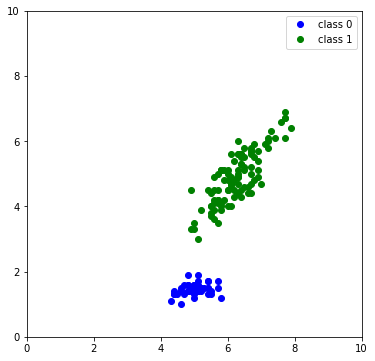

In [15]:
fig = plt.figure(figsize=(6,6))
plt.plot(x1[class_0],x2[class_0], 'o', c='blue',label='class 0')
plt.plot(x1[class_1],x2[class_1], 'o', c='green',label='class 1')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
plt.show()

In [16]:
# función que queremos encontrar
def y(x):
 return -(b + w_1*x)/w_2

In [17]:
def act(z):
  return 1/(1 + np.exp(-z))

Epoch [1/15], bias: 0.0, w1: 0.9500000000000002, w2: 1.6500000000000001


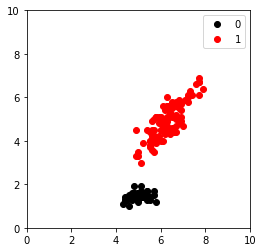

Epoch [2/15], bias: 0.0, w1: 1.9000000000000004, w2: 3.3000000000000003


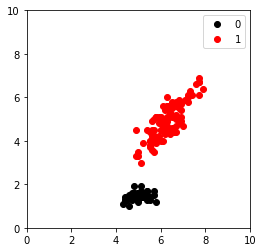

Epoch [3/15], bias: -0.5, w1: 0.5500000000000007, w2: 4.200000000000001


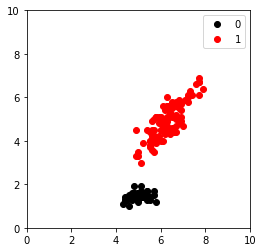

Epoch [4/15], bias: -0.5, w1: 0.850000000000001, w2: 5.250000000000001


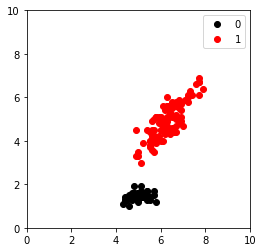

Epoch [5/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


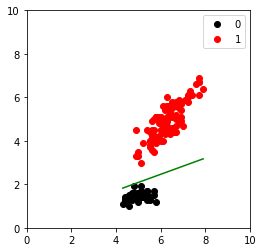

Epoch [6/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


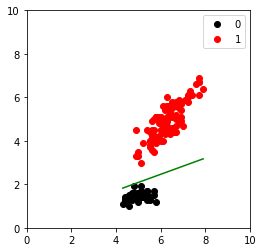

Epoch [7/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


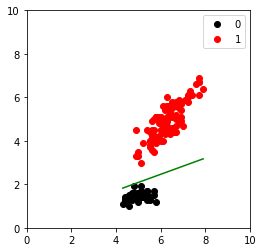

Epoch [8/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


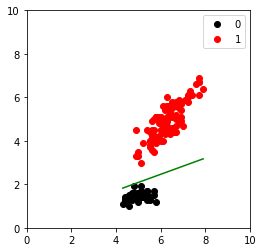

Epoch [9/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


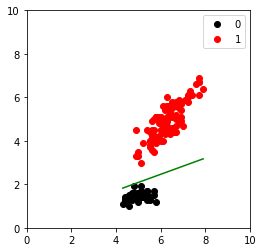

Epoch [10/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


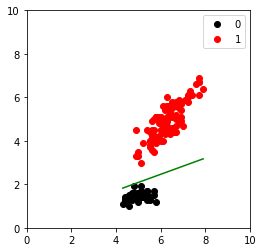

Epoch [11/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


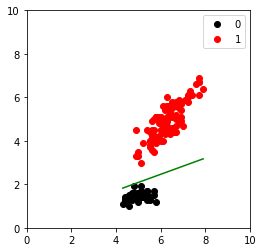

Epoch [12/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


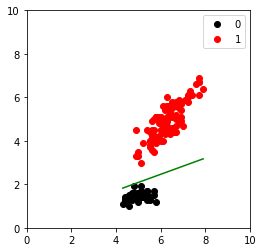

Epoch [13/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


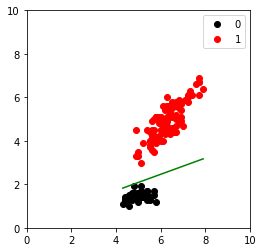

Epoch [14/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


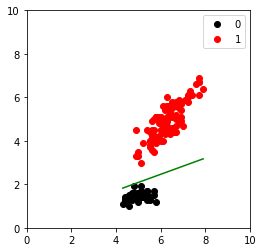

Epoch [15/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


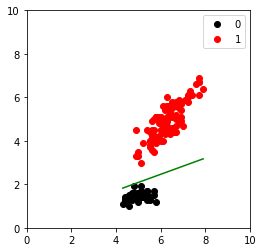

In [18]:
#-- Definimos el Perceptron

# Inicializamos los pesos en 0
b = 0
w_1 = 0
w_2 = 0

n_epochs = 15 
n = 0.5      

# Entrenamiento
for epoch in range(n_epochs):
  for i,j,k in zip(x1,x2,Y):
    
    z = i*w_1 + j*w_2 + b

    sig_z = act(z)

    if sig_z >= 0.5:
      out = 1
    if sig_z < 0.5:
      out = 0
  
    error = k - out

    b = b + n*error
    w_1 += n*error*i
    w_2 += n*error*j

  print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1,n_epochs,b,w_1,w_2))

  fig = plt.figure(figsize=(4,4))
  plt.plot(x1[class_0],x2[class_0],'o', c='black', label='0')
  plt.plot(x1[class_1],x2[class_1],'o', c='red', label='1')

  plt.plot(np.sort(x1),y(np.sort(x1)),'-', c='green')
  
  plt.xlim(0,10)
  plt.ylim(0,10)
  plt.legend()
  plt.show()

PROBLEMA 2

Utilice un MLP para entrenar dos modelos: uno de dos capas y otro de tres capas que usando los 4 features del dataset de Orquídeas Iris le permita clasificar entre las clases Iris Setosa, Iris Versicolor e Iris Virginica. Evalue sus modelos con el accuracy score

In [19]:
data2 = pd.read_csv('iris.data', names=['Sepal_Length', 'Sepal_Width','Petal_Length','Petal_Width','Clase'])

data2.replace(to_replace ="Iris-setosa",value = 0, inplace = True)
data2.replace(to_replace ="Iris-versicolor",value = 1, inplace = True)
data2.replace(to_replace ="Iris-virginica",value = 2, inplace = True)

In [20]:
data2.keys()

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Clase'], dtype='object')

In [21]:
data2

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
X = data2.drop(['Clase'], axis = 'columns')
Y = data2['Clase']

In [23]:
X

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


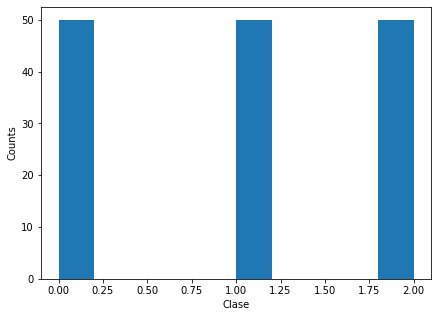

In [24]:
fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.ylabel('Counts')
plt.xlabel('Clase')
plt.show()

In [25]:
Y = np.array(Y)

MODELO #1

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [27]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='relu',  hidden_layer_sizes=(2, 2), solver='adam', learning_rate_init=0.1)
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:

model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [29]:
Y_pred

array([2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 1, 0])

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_test)

0.9736842105263158

MODELO #2

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [32]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='relu',  hidden_layer_sizes=(2,2,2), solver='adam', learning_rate_init=0.1)
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2, 2), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [33]:
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [34]:
Y_pred

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0])

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_test)

0.6578947368421053